In [1]:
import os
import re
import jax
import jax.numpy as jnp
from matplotlib import pyplot as plt
import numpy as np

In [34]:
hyper = np.load("run/heisenberg/hyper_cube.npy")
N = 10
lr = hyper[:, 0].reshape((N,N))
rcond = hyper[:, 1].reshape((N,N))

In [35]:
betas = [0, 0.1, 0.2, 0.3]
rel_errs = []
survival = []

leaders = []
leaders_hyp = []

for i, beta in enumerate(betas):
    path = "/mnt/beegfs/workdir/evan.wonisch/NeuralQuantumStates/data/gridsearch/beta="+str(beta)+"/"
    files = os.listdir(path)
    re_flat = np.zeros((N*N,)) - 1
    num = np.zeros((N*N,))

    for file in files:
        index = int(re.split("=|_", file)[2])
        hyper_param = hyper[index]
        seed = re.split("=|_", file)[4]
        type = re.split("\.|_", file)[-2]

        if type == "err":
            err = np.load(path + file)
            final_err = jnp.mean(err[-10:-1])
            # final_err = err[-1]

            if re_flat[index] == -1:        # minimum error
                re_flat[index] = final_err

            if final_err < re_flat[index]:
                re_flat[index] = err[-1]

            if len(leaders) <= i:            # leader
                leaders.append(err)
                leaders_hyp.append(hyper_param)
            else:
                if final_err < leaders[i][-1]:
                    leaders[i] = err
                    leaders_hyp[i] = hyper_param

            num[int(index)] += 1

    rel_errs.append(re_flat.reshape((N,N)))
    survival.append(num.reshape((10,10))/10)

/tmp/ipykernel_59030/3913236338.py:24: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  f.colorbar(re_im, cax=cbar_ax)
/tmp/ipykernel_59030/3913236338.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()


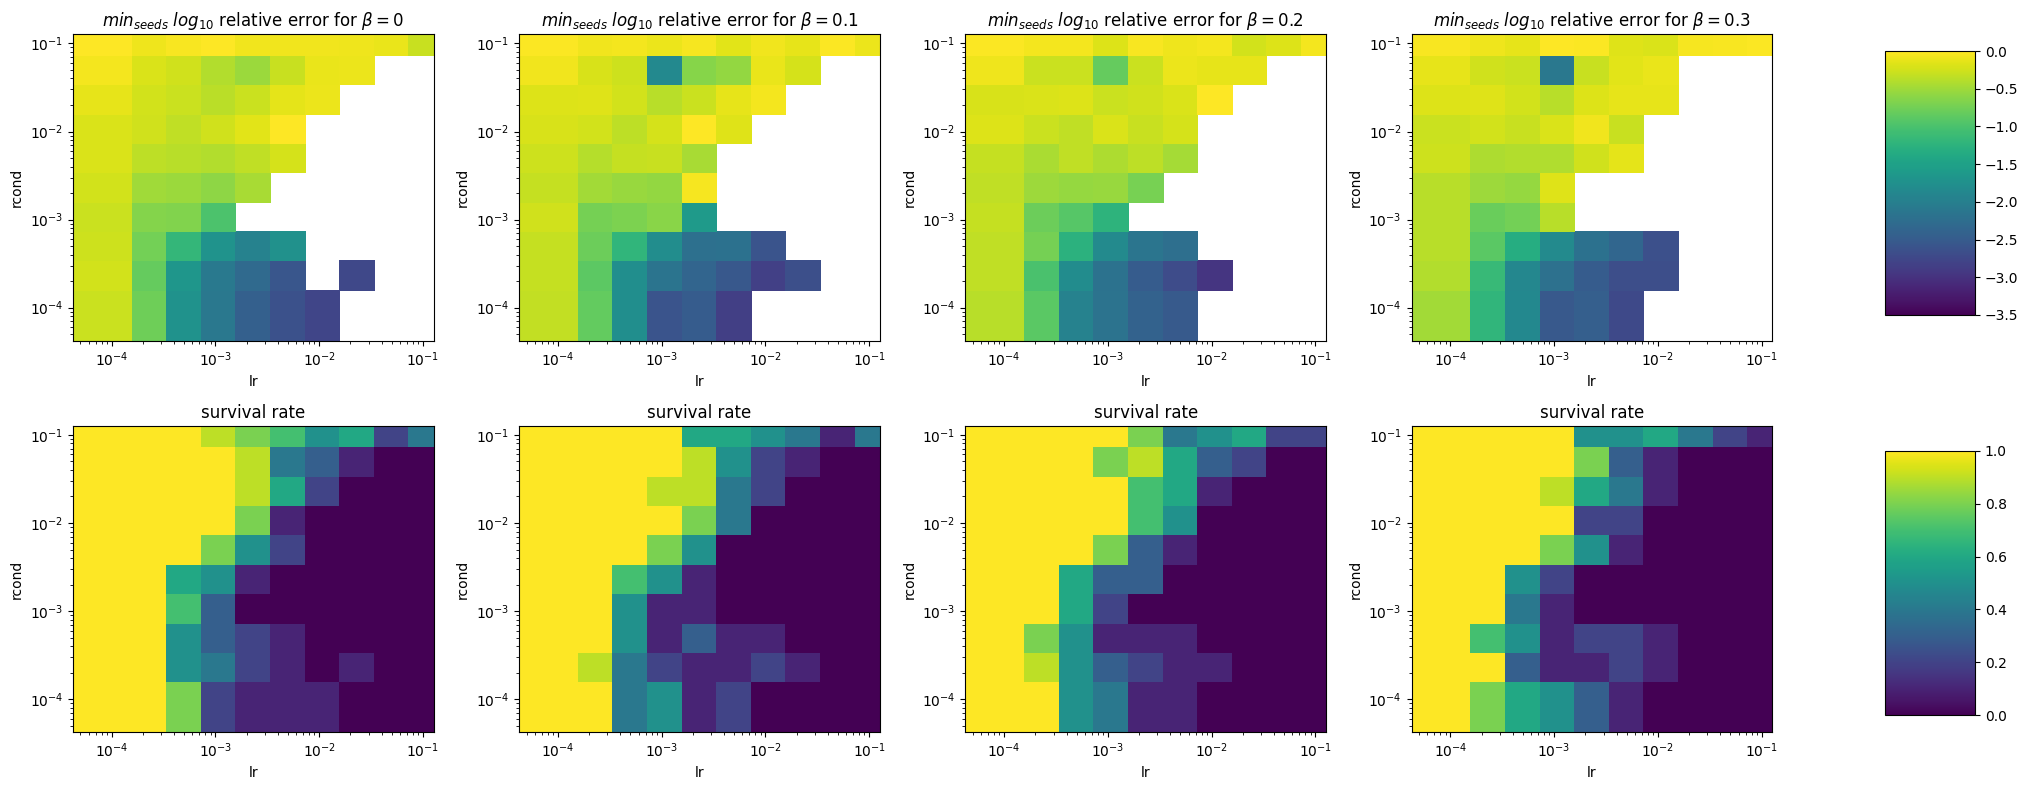

In [36]:
f, axs = plt.subplots(2, len(betas), figsize = (18,8))

re_axes = []
surv_axes = []
for i, beta in enumerate(betas):
    re_im = axs[0, i].pcolor(lr, rcond, jnp.log(rel_errs[i])/jnp.log(10), vmin = -3.5, vmax = 0)
    axs[0, i].set_ylabel("rcond")
    axs[0, i].set_xlabel("lr")
    axs[0, i].set_title("$min_{seeds}$ $log_{10}$ relative error for $\\beta="+str(beta)+"$")
    axs[0, i].set_xscale("log")
    axs[0, i].set_yscale("log")
    re_axes.append(axs[0,i])

    surv_im = axs[1, i].pcolor(lr, rcond, survival[i])
    axs[1, i].set_ylabel("rcond")
    axs[1, i].set_xlabel("lr")
    axs[1, i].set_title("survival rate")
    axs[1, i].set_xscale("log")
    axs[1, i].set_yscale("log")
    surv_axes.append(axs[1, i])

# error
cbar_ax = f.add_axes([1.05, 0.6, 0.05, 0.33])
f.colorbar(re_im, cax=cbar_ax)

# survival
cbar_ax = f.add_axes([1.05, 0.1, 0.05, 0.33])
f.colorbar(surv_im, cax=cbar_ax)

f.tight_layout()

## leaders

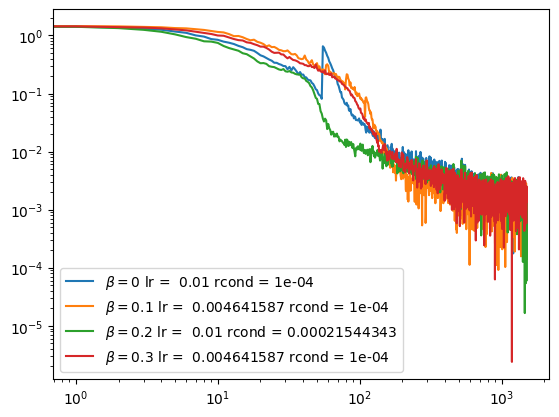

In [41]:
for i, beta in enumerate(betas):
    plt.plot(leaders[i], label = "$\\beta = $"+str(beta)+" lr =  "+str(leaders_hyp[i][0]) + " rcond = "+str(leaders_hyp[i][1]))

plt.yscale("log")
plt.xscale("log")
plt.legend()

### Fine Grid

In [8]:
np.load("data/gridsearch_fine/beta=0/hyper_i=0_seed=0_summary.npy")

array([12.82242644,  0.02063081,  1.44882016])

In [9]:
np.load("data/gridsearch_fine/beta=0/hyper_i=0_seed=0_rel_err.npy")

array([1.44567963, 1.45759367, 1.45687016, 1.45536227, 1.45749595])

In [10]:
15**2

225